<a href="https://colab.research.google.com/github/ngc40384039/Luna/blob/main/GuinierAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rg = 10.07 nm, I(0) = 0.27


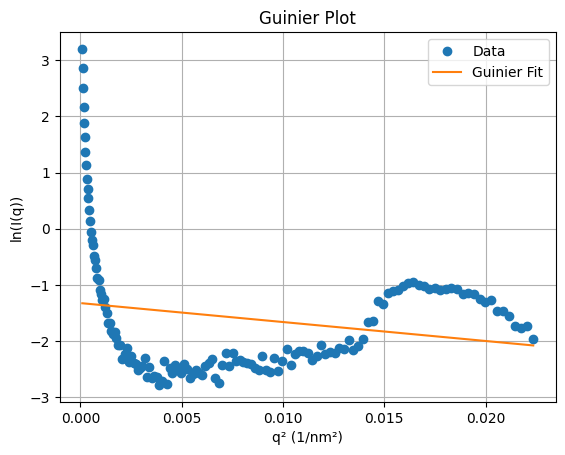

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Load data
data = np.loadtxt("/content/PEG1_1.dat")
q = data[:, 0]
Iq = data[:, 1]

#Filter low-q data for Guinier region
mask = q < 0.15
q_fit = q[mask]
Iq_fit = Iq[mask]

#ln(I) vs q^2
lnI = np.log(Iq_fit)
q2 = q_fit**2
slope, intercept, *_ = linregress(q2, lnI)
Rg = np.sqrt(-3 * slope)
I0 = np.exp(intercept)

print(f"Rg = {Rg:.2f} nm, I(0) = {I0:.2f}")
plt.plot(q2, lnI, 'o', label='Data')
plt.plot(q2, slope*q2 + intercept, '-', label='Guinier Fit')
plt.xlabel('q² (1/nm²)')
plt.ylabel('ln(I(q))')
plt.title('Guinier Plot')
plt.legend()
plt.grid()
plt.show()
